# World with Slower Speed of Light [Brendan Slonacher]

Imagine a world where the speed of light is not 299,792,458 m/s but instead 10 m/s, comparable to walking. In this thought experiment, I will explore how such a drastic change affects what you see as you move. Light’s finite speed becomes noticeable, bending your field of view and shifting colors dramatically. This notebook walks you through the relativistic effects—aberration and Doppler shift—using visualizations that would appear if almost all speeds were a large fraction of light speed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

If you were to walk through a park, various affects would be revealed. Objects ahead of you would seem to crowd into the center of your vision, while those behind stretch away. Colors change too: trees ahead glow blue, while those behind fade to red. This is due to relativistic effects, which become pronounced when your speed is a significant fraction of light’s. Let’s start by visualizing how your field of view distorts.

In [2]:
# Constants
c = 10.0  # Speed of light in m/s
v = 5.0   # Observer's speed in m/s

Relativistic aberration warps your field of view. This causes objects in front of you to compress into a tight central region, while those behind spread out, creating a distorted “ring” of visibility. This happens because light’s finite speed and your motion change the angles at which light reaches your eyes. Let’s plot this distortion to see how your view of the world changes.

**Equation for Relativistic Aberration**

The angular distortion is governed by the aberration formula:

$$
\cos \theta' = \frac{\cos \theta + v/c}{1 + (v/c) \cos \theta}
$$

where:
* $\theta$ is the angle in the rest frame
* $\theta'$ is the observed angle
* $v$ is the observer's speed
* $c$ is the speed of light (which is slowed in our case)

(np.float64(-1.0994713695023444),
 np.float64(1.0999748271191592),
 np.float64(-1.099867834057569),
 np.float64(1.0999937063836938))

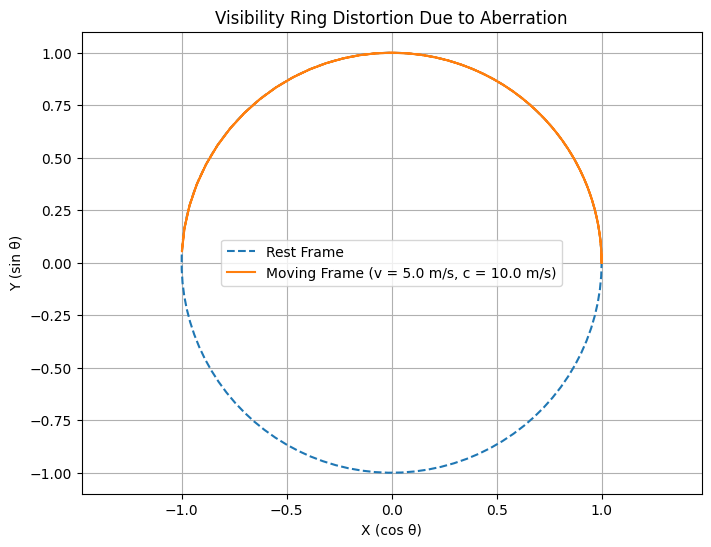

In [3]:
def aberration_angle(theta, v, c):
    """Calculate observed angle due to relativistic aberration."""
    cos_theta_prime = (np.cos(theta) + v/c) / (1 + (v/c) * np.cos(theta))
    return np.arccos(np.clip(cos_theta_prime, -1, 1))

# Generate angles from 0 to 2π
theta = np.linspace(0, 2 * np.pi, 100)
theta_prime = aberration_angle(theta, v, c)

# Plot visibility ring
plt.figure(figsize=(8, 6))
plt.plot(np.cos(theta), np.sin(theta), label='Rest Frame', linestyle='--')
plt.plot(np.cos(theta_prime), np.sin(theta_prime), label=f'Moving Frame (v = {v} m/s, c = {c} m/s)')
plt.title('Visibility Ring Distortion Due to Aberration')
plt.xlabel('X (cos θ)')
plt.ylabel('Y (sin θ)')
plt.legend()
plt.grid(True)
plt.axis('equal')

You would also see the colors around you shifting as you move. Trees you approach appear bluer, their light waves compressed by your motion relative to the slower speed of light. Trees behind you stretch to redder hues. This is the relativistic Doppler effect, altering the wavelength of light based on your direction and speed. Let’s visualize how the color of an object changes depending on its angle relative to your motion.

**Equation for Relativistic Aberration**

The wavelength shift is described by the general relativistic Doppler formula:

$$
\lambda_{\text{observed}} = \lambda_{\text{emitted}} \frac{\sqrt{1 - (v/c)^2}}{1 + (v/c) \cos\theta}
$$

where:
* $\lambda_{\text{emitted}}$ is the wavelength of light as emitted by the source (in its rest frame).
* $\lambda_{\text{observed}}$ is the wavelength of light as measured by the observer.
* $v$ is the speed of the observer relative to the stationary source.
* $c$ is the speed of light in a vacuum.
* $\theta$ is the angle to the light source relative to the observer's direction of motion, as measured in the rest frame of the source.


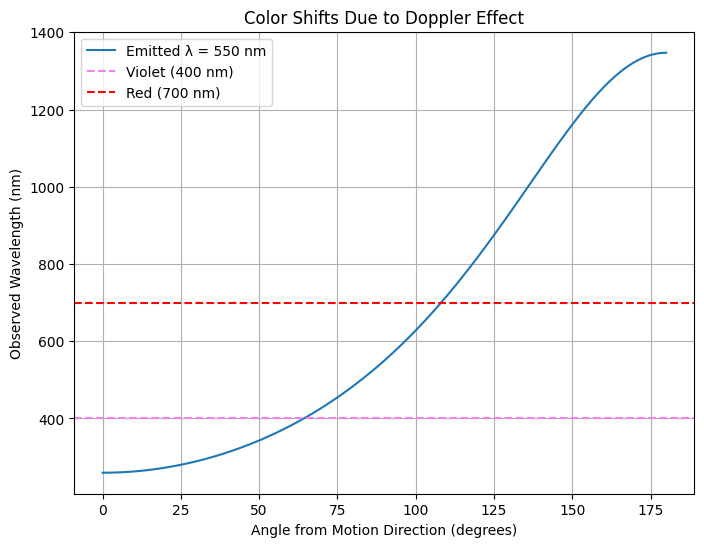

In [4]:
def doppler_shift(lambda_emitted, v, c, theta):
    """Calculate observed wavelength due to relativistic Doppler effect."""
    beta = v / c
    cos_theta = np.cos(theta)
    return lambda_emitted * np.sqrt((1 - beta * cos_theta)) / (1 + beta * cos_theta)

# Simulate Doppler shift for green light (550 nm)
lambda_emitted = 550
theta_doppler = np.linspace(0, np.pi, 100)
lambda_observed = doppler_shift(lambda_emitted, v, c, theta_doppler)

plt.figure(figsize=(8, 6))
plt.plot(theta_doppler * 180 / np.pi, lambda_observed, label=f'Emitted λ = {lambda_emitted} nm')
plt.axhline(y=400, color='violet', linestyle='--', label='Violet (400 nm)')
plt.axhline(y=700, color='red', linestyle='--', label='Red (700 nm)')
plt.title('Color Shifts Due to Doppler Effect')
plt.xlabel('Angle from Motion Direction (degrees)')
plt.ylabel('Observed Wavelength (nm)')
plt.legend()
plt.grid(True)

What you would ultimitaly see is a combination of these two affects. Picture a grid of objects, like trees in a park, each emitting green light. As you walk, their positions distort due to aberration and their colors shift due to the Doppler effect. The visualization below shows this grid as you move forward, with objects ahead bunching up and turning blue, while those behind spread out and redden.

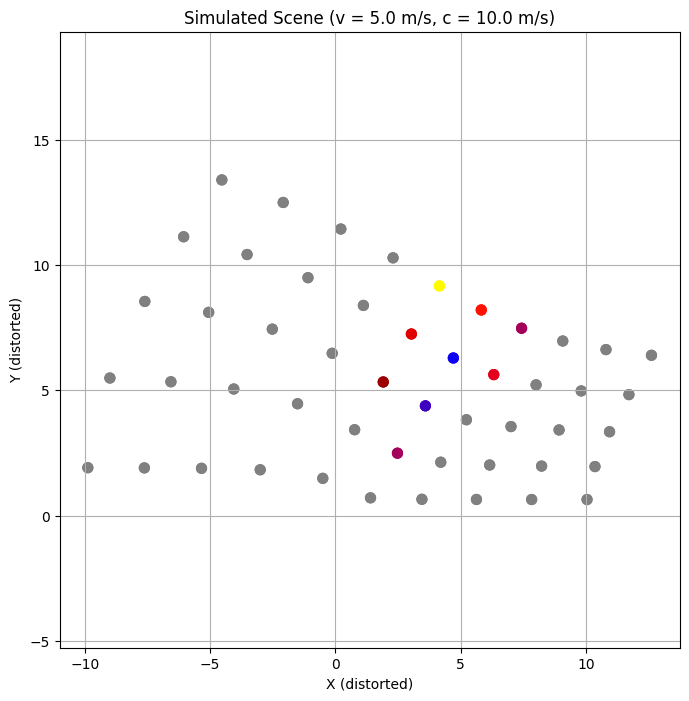

In [5]:
# Simplified wavelength-to-RGB function
def wavelength_to_rgb(wavelength):
    """Map wavelength (400-700 nm) to approximate RGB color."""
    if wavelength < 400 or wavelength > 700:
        return (0.5, 0.5, 0.5)  # Gray for out-of-range wavelengths
    if wavelength < 500:
        t = (wavelength - 400) / 100  # Violet to blue
        return (1 - t, 0, t)
    elif wavelength < 600:
        t = (wavelength - 500) / 100  # Blue to green
        return (1, t, 0)
    else:
        t = (700 - wavelength) / 100  # Green to red
        return (t, 0, 0)

# Define a 2D grid of points
x = np.linspace(-10, 10, 10)
y = np.linspace(-10, 10, 10)
X, Y = np.meshgrid(x, y)
points = np.vstack([X.ravel(), Y.ravel()]).T
colors_emitted = np.full(len(points), 550)  # Green light (550 nm)

def render_scene(v, c, points, colors_emitted):
    """Render the scene with aberration and Doppler shifts."""
    theta = np.arctan2(points[:, 1], points[:, 0])
    r = np.sqrt(points[:, 0]**2 + points[:, 1]**2)
    theta_prime = aberration_angle(theta, v, c)
    x_prime = r * np.cos(theta_prime)
    y_prime = r * np.sin(theta_prime)
    lambda_observed = doppler_shift(colors_emitted, v, c, theta)
    colors = [wavelength_to_rgb(l) for l in lambda_observed]

    plt.figure(figsize=(8, 8))
    plt.scatter(x_prime, y_prime, c=colors, s=50)
    plt.title(f'Simulated Scene (v = {v} m/s, c = {c} m/s)')
    plt.xlabel('X (distorted)')
    plt.ylabel('Y (distorted)')
    plt.axis('equal')
    plt.grid(True)
    plt.savefig('scene.png')
    plt.show()

render_scene(v, c, points, colors_emitted)

What happens if you walk faster or slower? Use the slider below to adjust your speed and see how the world changes. Notice how the visibility ring tightens and colors shift more dramatically as your speed approaches the speed of light (10 m/s).

In [6]:
import ipywidgets as widgets

@widgets.interact(v=(0, c*0.99, 0.1))
def interactive_scene(v):
    render_scene(v, c, points, colors_emitted)

interactive(children=(FloatSlider(value=4.9, description='v', max=9.9), Output()), _dom_classes=('widget-inter…

And that's it! Hopefully the simulations work as they should. The math here was a bit more complicated than I believed it would be when I started.